In [111]:
# Loading in libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix
from scipy.stats import ttest_1samp
from statsmodels.stats.proportion import proportions_ztest
from IPython.display import display, Math

In [112]:
# Importing the csv file as a dataframe, making a copy, and previewing the first 5 rows
df = pd.read_csv('Team Summaries.csv')
original = df.copy()

df.head()

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2024,NBA,Atlanta Hawks,ATL,False,26.2,36.0,46.0,36.0,46.0,...,11.6,27.1,0.200,0.572,12.4,75.2,0.192,State Farm Arena,696418.0,16986.0
1,2024,NBA,Boston Celtics,BOS,True,28.2,64.0,18.0,66.0,16.0,...,10.8,24.9,0.180,0.523,10.8,76.3,0.145,TD Garden,766240.0,18689.0
2,2024,NBA,Brooklyn Nets,BRK,False,26.1,32.0,50.0,34.0,48.0,...,11.8,25.2,0.177,0.543,11.4,76.0,0.193,Barclays Center,720291.0,17568.0
3,2024,NBA,Chicago Bulls,CHI,False,28.1,39.0,43.0,37.0,45.0,...,11.0,25.1,0.187,0.556,12.7,76.4,0.195,United Center,845620.0,20625.0
4,2024,NBA,Charlotte Hornets,CHO,False,25.1,21.0,61.0,18.0,64.0,...,12.6,21.1,0.167,0.572,12.3,74.5,0.188,Spectrum Center,674400.0,16449.0


In [113]:
# Creating a dataframe that contains rows from the 2014-2023 seasons for each team
teams_14_23 = df[(df['season'] >= 2014) & (df['season'] < 2024) & (df['team'] != 'League Average')].copy()

teams_14_23.head()

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
31,2023,NBA,Atlanta Hawks,ATL,False,24.9,41.0,41.0,42.0,40.0,...,11.2,25.1,0.200,0.552,12.4,75.8,0.206,State Farm Arena,719787.0,17556.0
32,2023,NBA,Boston Celtics,BOS,False,27.4,57.0,25.0,57.0,25.0,...,12.0,22.1,0.197,0.528,11.3,78.5,0.180,TD Garden,766240.0,18689.0
33,2023,NBA,Brooklyn Nets,BRK,False,28.0,45.0,37.0,43.0,39.0,...,12.7,19.6,0.208,0.530,12.2,73.7,0.212,Barclays Center,724439.0,17669.0
34,2023,NBA,Chicago Bulls,CHI,False,27.5,40.0,42.0,44.0,38.0,...,12.2,20.1,0.203,0.544,13.5,77.8,0.197,United Center,841632.0,20528.0
35,2023,NBA,Charlotte Hornets,CHO,False,25.3,27.0,55.0,26.0,56.0,...,12.3,23.8,0.195,0.544,12.5,75.5,0.211,Spectrum Center,702052.0,17123.0


In [114]:
# Getting a summary of the data and checking for duplicate rows and null values
print(f'There are {teams_14_23.duplicated().sum()} duplicate rows.\n')

print(f'Dataset Information:\n')
teams_14_23.info()

# There are no duplicate rows
# There are 4 null values in the 'arena' and 'attend_g' columns. Those missing values are unimportant for the analysis.

There are 0 duplicate rows.

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 31 to 339
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            300 non-null    int64  
 1   lg                300 non-null    object 
 2   team              300 non-null    object 
 3   abbreviation      300 non-null    object 
 4   playoffs          300 non-null    bool   
 5   age               300 non-null    float64
 6   w                 300 non-null    float64
 7   l                 300 non-null    float64
 8   pw                300 non-null    float64
 9   pl                300 non-null    float64
 10  mov               300 non-null    float64
 11  sos               300 non-null    float64
 12  srs               300 non-null    float64
 13  o_rtg             300 non-null    float64
 14  d_rtg             300 non-null    float64
 15  n_rtg             300 non-null    float64
 1

In [115]:
# Summary statistics for the numeric columns
teams_14_23.describe().round(2)

,season,age,w,l,pw,pl,mov,sos,srs,o_rtg,...,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,attend,attend_g
count,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00,...,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00,296.00,296.00
mean,2018.50,26.35,39.93,39.93,39.98,39.88,-0.02,-0.00,-0.02,109.61,...,0.52,12.82,23.48,0.20,0.52,12.82,76.50,0.20,652427.28,16303.05
std,2.88,1.73,12.00,11.79,11.57,11.37,4.65,0.35,4.52,4.25,...,0.02,0.98,2.44,0.02,0.02,1.10,1.91,0.02,202729.87,4888.97
min,2014.00,22.10,10.00,9.00,15.00,15.00,-10.64,-0.93,-10.66,95.50,...,0.46,9.90,17.90,0.14,0.46,10.30,71.00,0.16,5817.00,162.00
25%,2016.00,25.10,32.00,31.00,32.00,32.00,-3.04,-0.26,-2.96,106.10,...,0.50,12.20,21.60,0.19,0.51,12.00,75.30,0.19,627413.00,15974.00
50%,2018.50,26.20,41.50,39.00,41.00,39.00,0.29,0.00,0.16,109.85,...,0.52,12.70,23.40,0.20,0.52,12.80,76.50,0.20,703841.00,17449.50
75%,2021.00,27.42,48.25,48.25,49.00,48.00,3.19,0.24,3.02,112.90,...,0.54,13.42,24.92,0.22,0.54,13.60,77.80,0.22,766523.50,18997.00
max,2023.00,30.60,73.00,72.00,67.00,66.00,11.63,0.96,11.35,119.40,...,0.57,16.00,31.40,0.28,0.58,16.30,81.60,0.26,894659.00,21821.00


In [116]:
# Checking the 'playoffs' column to ensure correct values
teams_14_23['playoffs'].value_counts().reset_index()

# Count of 'playoffs' being True should be 160 over the 10 years, but it is only 144

,playoffs,count
0,False,156
1,True,144


In [117]:
# Fixing incorrect values for the 'playoffs' column in the year 2023
playoff_list_23 = ['DEN', 'MIN', 'PHO', 'LAC', 'SAC', 'GSW', 'MEM', 'LAL', 'MIL', 'MIA', 'CLE', 'NYK', 'PHI', 'BRK', 'BOS', 'ATL']

teams_14_23['playoffs'] = np.where((teams_14_23['abbreviation'].isin(playoff_list_23)) & (teams_14_23['season'] == 2023), True, teams_14_23['playoffs'])

teams_14_23['playoffs'].value_counts().reset_index()

# The variable is now accurate 

,playoffs,count
0,True,160
1,False,140


In [118]:
# Converting the 'playoffs' column to integer (True -> 1, False -> 0) for future model use
teams_14_23['playoffs'] = teams_14_23['playoffs'].astype(int)

teams_14_23['playoffs'].value_counts().reset_index()

,playoffs,count
0,1,160
1,0,140


In [119]:
# Adjusting the value of the 'e_fg_percent' and 'ft_fga' columns to make it more consistent with the other "Four Factors" variables that will be used in the models
teams_14_23['e_fg_percent'] = teams_14_23['e_fg_percent'] * 100
teams_14_23['ft_fga'] = teams_14_23['ft_fga'] * 100

teams_14_23[['e_fg_percent', 'tov_percent', 'orb_percent', 'ft_fga']].head()

,e_fg_percent,tov_percent,orb_percent,ft_fga
31,54.1,11.2,25.1,20.0
32,56.6,12.0,22.1,19.7
33,56.2,12.7,19.6,20.8
34,55.0,12.2,20.1,20.3
35,51.6,12.3,23.8,19.5


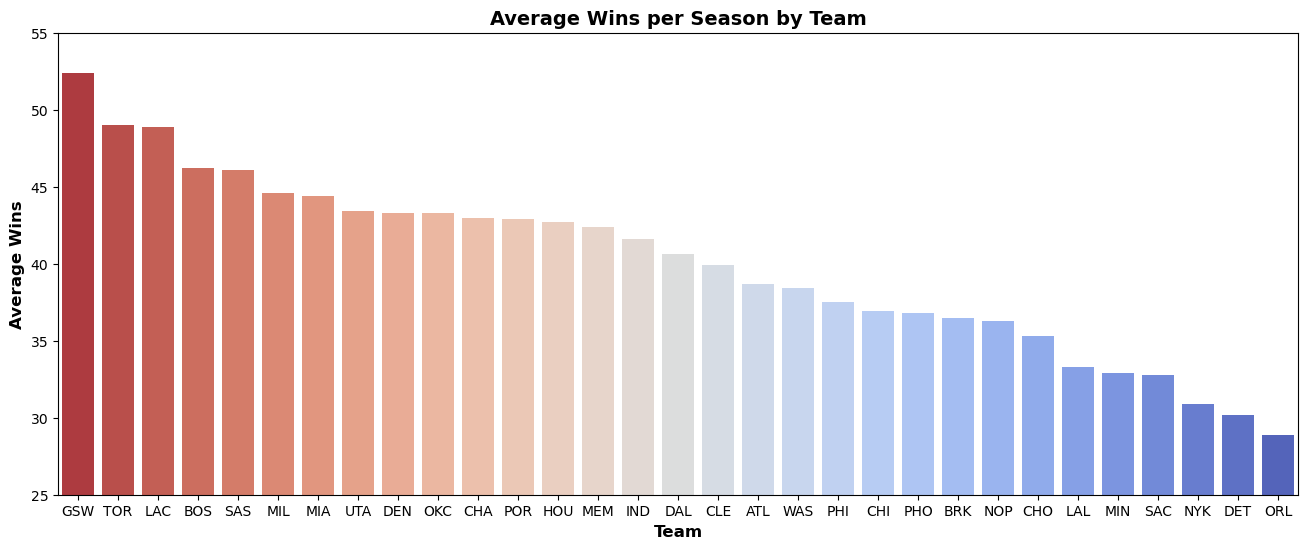

In [120]:
# Observing average wins for each team using a bar chart
teams_avg_wins = teams_14_23.groupby('abbreviation')['w'].mean().sort_values(ascending = False).reset_index()
plt.figure(figsize = (16, 6))
sns.barplot(data = teams_avg_wins, x = 'abbreviation', y = 'w', hue = 'abbreviation', palette = 'coolwarm_r')
plt.ylim(25, 55)
plt.title('Average Wins per Season by Team', fontsize = 14, weight = 'bold')
plt.xlabel('Team', fontsize = 12, weight = 'bold')
plt.ylabel('Average Wins', fontsize = 12, weight = 'bold')
plt.show()

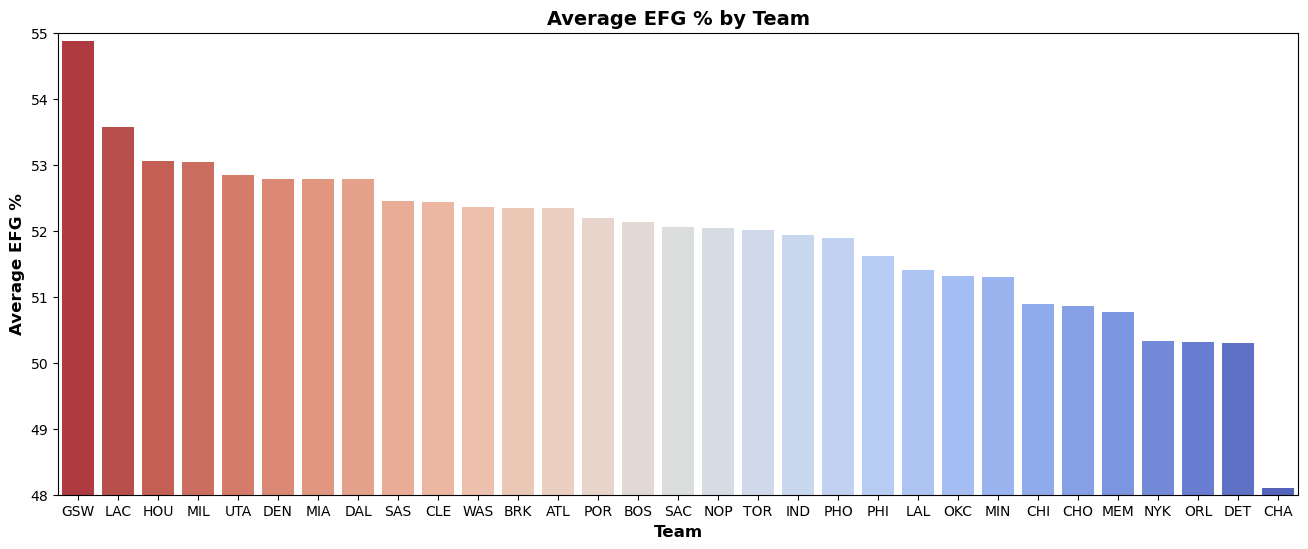

In [121]:
# Observing average effective field goal % for each team using a bar chart
teams_avg_efg = teams_14_23.groupby('abbreviation')['e_fg_percent'].mean().sort_values(ascending = False).reset_index()
plt.figure(figsize = (16, 6))
sns.barplot(data = teams_avg_efg, x = 'abbreviation', y = 'e_fg_percent', hue = 'abbreviation', palette = 'coolwarm_r')
plt.ylim(48, 55)
plt.title('Average EFG % by Team', fontsize = 14, weight = 'bold')
plt.xlabel('Team', fontsize = 12, weight = 'bold')
plt.ylabel('Average EFG %', fontsize = 12, weight = 'bold')
plt.show()

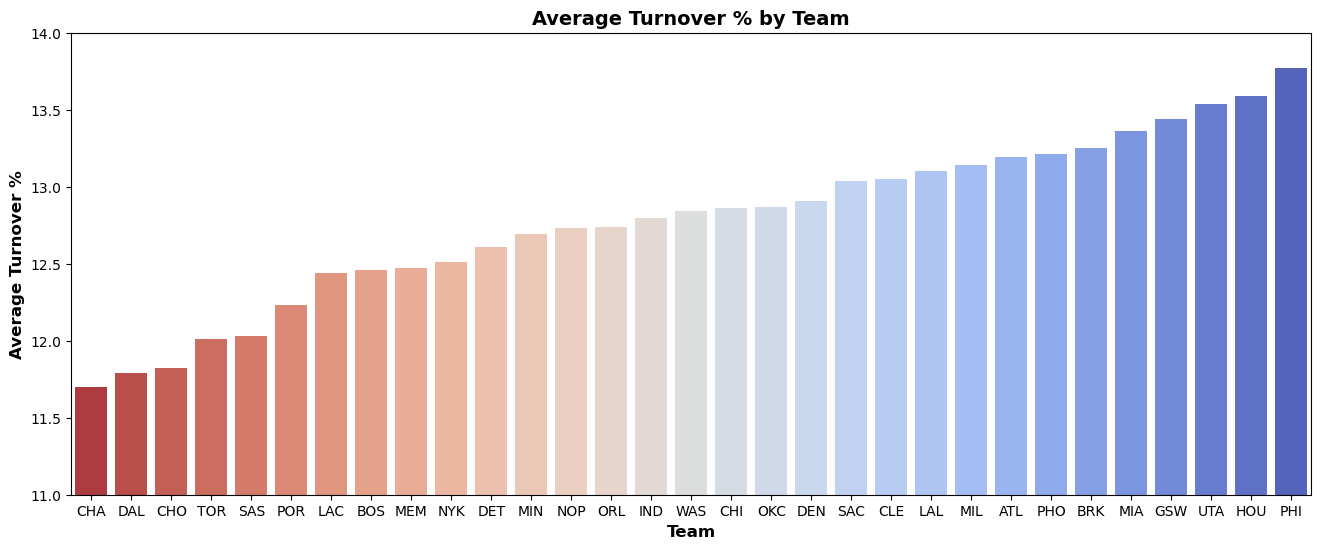

In [122]:
# Observing average turnover % for each team using a bar chart
teams_avg_tov = teams_14_23.groupby('abbreviation')['tov_percent'].mean().sort_values(ascending = True).reset_index()
plt.figure(figsize = (16, 6))
sns.barplot(data = teams_avg_tov, x = 'abbreviation', y = 'tov_percent', hue = 'abbreviation', palette = 'coolwarm_r')
plt.ylim(11, 14)
plt.title('Average Turnover % by Team', fontsize = 14, weight = 'bold')
plt.xlabel('Team', fontsize = 12, weight = 'bold')
plt.ylabel('Average Turnover %', fontsize = 12, weight = 'bold')
plt.show()

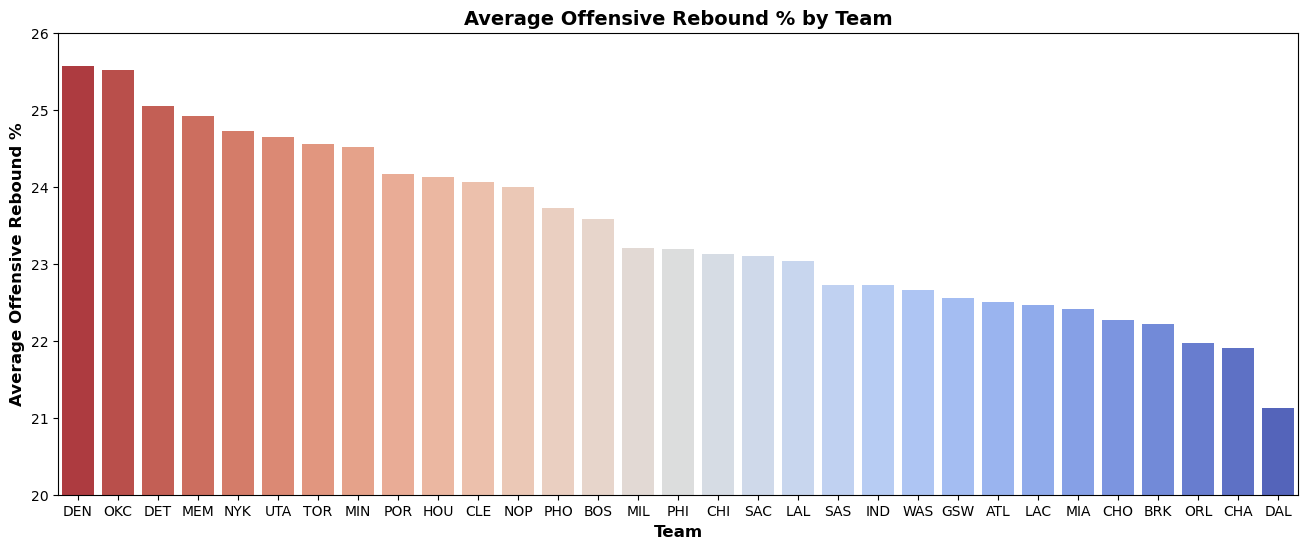

In [123]:
# Observing average offensive rebound % for each team using a bar chart
teams_avg_orb = teams_14_23.groupby('abbreviation')['orb_percent'].mean().sort_values(ascending = False).reset_index()
plt.figure(figsize = (16, 6))
sns.barplot(data = teams_avg_orb, x = 'abbreviation', y = 'orb_percent', hue = 'abbreviation', palette = 'coolwarm_r')
plt.ylim(20, 26)
plt.title('Average Offensive Rebound % by Team', fontsize = 14, weight = 'bold')
plt.xlabel('Team', fontsize = 12, weight = 'bold')
plt.ylabel('Average Offensive Rebound %', fontsize = 12, weight = 'bold')
plt.show()

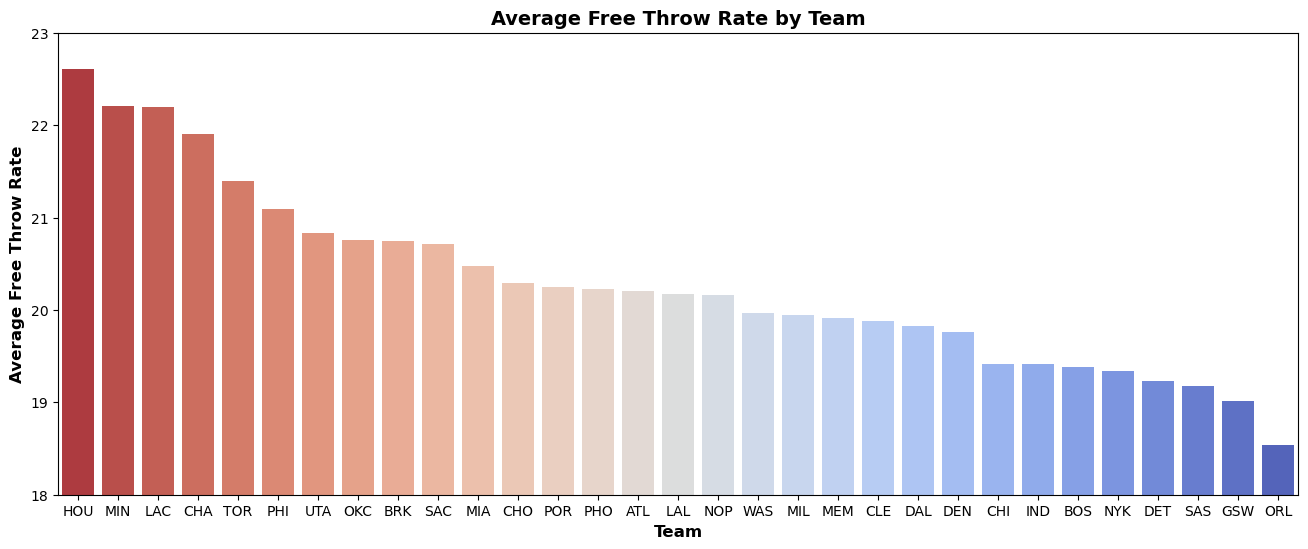

In [124]:
# Observing average free throw rate for each team using a bar chart
teams_avg_ftr = teams_14_23.groupby('abbreviation')['ft_fga'].mean().sort_values(ascending = False).reset_index()
plt.figure(figsize = (16, 6))
sns.barplot(data = teams_avg_ftr, x = 'abbreviation', y = 'ft_fga', hue = 'abbreviation', palette = 'coolwarm_r')
plt.ylim(18, 23)
plt.title('Average Free Throw Rate by Team', fontsize = 14, weight = 'bold')
plt.xlabel('Team', fontsize = 12, weight = 'bold')
plt.ylabel('Average Free Throw Rate', fontsize = 12, weight = 'bold')
plt.show()

In [125]:
# Creating the dataframe 'teams_24' that contains data for teams from the 2024 season to use as testing data

# Making the new dataframe and correcting the 'playoffs' column to ensure correct values
playoff_list_24 = ['CLE', 'IND', 'LAL', 'MIA', 'NOP', 'NYK', 'ORL', 'PHO', 'PHI', 'OKC', 'LAC', 'DAL', 'MIN', 'DEN', 'BOS', 'MIL']

teams_24 = df[(df['season'] == 2024) & (df['team'] != 'League Average')].copy()
teams_24.loc[teams_24['abbreviation'].isin(playoff_list_24), 'playoffs'] = True

# Adjusting the values of the 'e_fg_percent' and 'ft_fga' to remain consistent with the 'teams_14_23' dataframe 
teams_24['e_fg_percent'] = teams_24['e_fg_percent'] * 100
teams_24['ft_fga'] = teams_24['ft_fga'] * 100

# Converting 'playoffs' column to integer (True -> 1, False -> 0) for model use
teams_24['playoffs'] = teams_24['playoffs'].astype(int)

teams_24.head()

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2024,NBA,Atlanta Hawks,ATL,0,26.2,36.0,46.0,36.0,46.0,...,11.6,27.1,20.0,0.572,12.4,75.2,0.192,State Farm Arena,696418.0,16986.0
1,2024,NBA,Boston Celtics,BOS,1,28.2,64.0,18.0,66.0,16.0,...,10.8,24.9,18.0,0.523,10.8,76.3,0.145,TD Garden,766240.0,18689.0
2,2024,NBA,Brooklyn Nets,BRK,0,26.1,32.0,50.0,34.0,48.0,...,11.8,25.2,17.7,0.543,11.4,76.0,0.193,Barclays Center,720291.0,17568.0
3,2024,NBA,Chicago Bulls,CHI,0,28.1,39.0,43.0,37.0,45.0,...,11.0,25.1,18.7,0.556,12.7,76.4,0.195,United Center,845620.0,20625.0
4,2024,NBA,Charlotte Hornets,CHO,0,25.1,21.0,61.0,18.0,64.0,...,12.6,21.1,16.7,0.572,12.3,74.5,0.188,Spectrum Center,674400.0,16449.0


In [126]:
# Confirming the 'playoff' column is accurate
teams_24['playoffs'].value_counts().reset_index()

,playoffs,count
0,1,16
1,0,14


# Creating a Linear Regression Model

### Objective: 
- To determine if the "Four Factors" (effective field goal percentage, turnover percentage, offensive rebound percentage, and free throws made per 100 field goal attempts) are significant predictors of the number of wins for a basketball team.

### Process:
- This will be tested using a Multi Linear Regression (MLR) model, which regresses the number of wins for each team on the "Four Factors" for data from the 2014-2023 seasons. We will then compare the MLR model's performance against a baseline model using a one-sample $t$-test on new data from the 2024 season to determine whether the MLR model is significantly more accurate at predicting the number of wins at the 5% significance level.

### Significance level: 
- $\alpha = .05$
  
### Null hypothesis: 
- $H_0$: $p$-value $\geq .05$
- The "Four Factors" are not significant predictors in the number of wins for a team.

### Alternative hypothesis: 
- $H_1$: $p$-value $< .05$
- The "Four Factors" are a significant predictor of the number of wins for a team.

In [128]:
# Creating a linear regression model using the "Four Factors" as the independent variables

# Defining the dependent and independent variables
X = teams_14_23[['e_fg_percent', 'tov_percent', 'orb_percent', 'ft_fga']]
X = sm.add_constant(X)

y = teams_14_23['w']

# Initializing and fitting the OLS model using the formula and displaying the summary of the results
ols = sm.OLS(y, X).fit()

ols_results = ols.summary()

ols_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      w   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     41.79
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           9.47e-28
Time:                        15:43:26   Log-Likelihood:                -1103.2
No. Observations:                 300   AIC:                             2216.
Df Residuals:                     295   BIC:                             2235.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -127.8192     18.485     -6.915      0.000    -164.198     -91.440
e_fg_percent     2.7807      0.252     11.029      0.000       2.285       3.277
tov_percent     -2.0990      0.591     -3.550      0.000      -3.263      -0.935
orb_percent      1.2296      0.245      5.010      0.000       0.747       1.713
ft_fga           1.0429      0.274      3.805      0.000       0.503       1.582
==============================================================================
Omnibus:                        2.159   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.340   Jarque-Bera (JB):                1.989
Skew:                           0.112   Prob(JB):                        0.370
Kurtosis:                       2.670   Cond. No.                     2.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Summary Results

### Explained Variation: 
- About $36.2\%$ of the variation in **wins** can be explained by the "Four Factors".

### Model Significance: 
- The $p$-value associated with the $F$-statistic is extremely low ($< .0001$), indicating that the overall model is highly significant.

### Coefficients: 
- **Effective Field Goal Percentage** (EFG%)  had the largest absolute coefficient, with an increase of approximately $2.78$ wins for every $1\%$ increase in EFG%.

### $p$-values: 
- All independent variables had $p$-values less than $0.05$, indicating significance at the 5% level. All $p$-values were approximately $0.000$.

In [130]:
# Generating new testing data from the 'teams_24' dataframe 
X_test = teams_24[['e_fg_percent', 'tov_percent', 'orb_percent', 'ft_fga']]
X_test = sm.add_constant(X_test)

y_test = teams_24['w'].astype('int64')

#Retrieving and printing the actual values of wins vs. the predicted values
y_preds = ols.predict(X_test).round().astype('int64')

display(Math('\\text{Actual Wins:}'))
print(list(y_test))
display(Math('\\text{Predicted Wins:}'))
print(list(y_preds))
print(f'\n')

# Displaying model evaluation metrics 
rmse = round(np.sqrt(mean_squared_error(y_test, y_preds)), 1)

mae = round((mean_absolute_error(y_test, y_preds)), 1)

r2 = round((r2_score(y_test, y_preds)), 3)

display(Math(f'\\text{{Root Mean Squared Error: }} {rmse}'))
display(Math(f'\\text{{Mean Absolute Error: }} {mae}'))
display(Math(f'R^2: {r2}'))

# The model appears to overestimate the number of wins, particularly for teams with actual win totals below 30.

<IPython.core.display.Math object>

[36, 64, 32, 39, 21, 48, 50, 57, 14, 46, 41, 47, 51, 47, 27, 46, 49, 56, 49, 50, 57, 47, 47, 49, 21, 46, 22, 25, 31, 15]


<IPython.core.display.Math object>

[52, 60, 45, 48, 36, 48, 52, 53, 40, 52, 47, 56, 55, 50, 34, 46, 55, 51, 54, 54, 54, 49, 51, 55, 37, 50, 39, 44, 50, 38]




<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [131]:
# Defining baseline predictions as the mean of actual wins
baseline_preds = np.full_like(y_test, y_test.mean(), dtype = int)

# Calculating errors for both the model and the baseline
baseline_errors = abs(y_test - baseline_preds)
display(Math(f'\\text{{Mean Absolute Error of Baseline: }} {round(baseline_errors.mean(), 1)}'))

model_errors = abs(y_test - y_preds)
display(Math(f'\\text{{Mean Absolute Error of Model: }} {round(model_errors.mean(), 1)}'))

# Calculating the difference between model errors and baseline errors
error_diff = baseline_errors - model_errors

# Performing a one-sample t-test to check if model errors are significantly smaller than baseline errors
stat, pval = ttest_1samp(error_diff, 0)

# Displaying the results of the t-test
if pval < 0.05 and np.mean(error_diff) > 0:
    display(Math(f'p\\text{{-value}} = {round(pval, 3)}'))
    print('The model is statistically significant at generating more accurate predictions than the baseline at the 5% significance level.')
else:
    display(Math(f'p\\text{{-value}} = {round(pval, 3)}'))
    print('There is no significant difference in performance at the 5\% significance level.')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The model is statistically significant at generating more accurate predictions than the baseline at the 5% significance level.


# Statement: 
- With a $p$-value of about $.034$, we can reject the null hypothesis at the $5\%$ level of significance, meaning the 'Four Factors' are statistically significant predictors of a team's wins in a given season.    

# Creating a Logistic Regression Model

### Objective: 
- To determine whether the "Four Factors" stats from the 2014-2023 season are accurate predictors of whether a team made the playoffs.

### Process:
- This will be tested using a logistic regression model that regresses whether a team made the playoffs (1) or not (0) based on each of the "Four Factors" for data from the 2014-2023 seasons.
- The logistic regression model will then be tested against a baseline model using new data from the 2024 season. A proportions $z$-test will determine whether the logistic regression model is more accurate at predicting playoff appearances at the $5\%$ significance level.

### Significance level: 
- $\alpha = .05$

### Null Hypothesis: 
- $H_0$: $p$-value $\geq .05$
- The "Four Factors" variables from the 2014-2023 seasons are not statistically significant predictors of whether a team made the playoffs.

### Alternative Hypothesis: 
- $H_1$: $p$-value $< .05$
- The "Four Factors" variables from the 2014-2023 seasons are statistically significant predictors of whether a team made the playoffs.

In [134]:
# Creating a logistic regression model to predict whether a team made the playoffs or not using the "Four Factors"

# Defining the dependent and independent variables
X = teams_14_23[['e_fg_percent', 'tov_percent', 'orb_percent', 'ft_fga']]
X = sm.add_constant(X)

y = teams_14_23['playoffs']

# Initializing and fitting the model, and printing the summary of the results
logit = sm.Logit(y, X).fit()

logit_results = logit.summary()

logit_results

Optimization terminated successfully.
         Current function value: 0.560366
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               playoffs   No. Observations:                  300
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            4
Date:                Tue, 25 Feb 2025   Pseudo R-squ.:                  0.1890
Time:                        15:43:26   Log-Likelihood:                -168.11
converged:                       True   LL-Null:                       -207.28
Covariance Type:            nonrobust   LLR p-value:                 3.925e-16
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -27.1266      4.861     -5.580      0.000     -36.654     -17.599
e_fg_percent     0.4574      0.069      6.657      0.000       0.323       0.592
tov_percent     -0.3687      0.146     -2.519      0.012      -0.656      -0.082
orb_percent      0.1613      0.060      2.707      0.007       0.045       0.278
ft_fga           0.2188      0.067      3.241      0.001       0.086       0.351
================================================================================
"""

# Summary Results:

### Explained Variation: 
- About $18.9\%$ of the variation in **playoffs** can be explained by the "Four Factors" according to the pseudo $R^2$, a measure of model fit for logistic regression.

### Coefficients: 
- **Effective Field Goal Percentage** (EFG%) had the largest absolute value of the coefficient. For every $1\%$ increase in EFG%, the log odds of making the playoffs increased by approximately $.457$.

### $p$-values: 
- All independent variables had p-values less than $0.05$, indicating that each of the "Four Factors" is a statistically significant predictor at the $5\%$ significance level.

<IPython.core.display.Math object>

[0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


<IPython.core.display.Math object>

[1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0]




<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

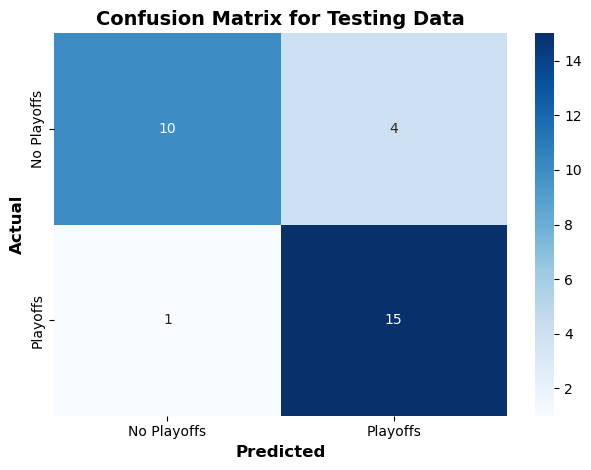

In [136]:
# Generating new testing data from the 'teams_24' dataframe 
X_test = teams_24[['e_fg_percent', 'tov_percent', 'orb_percent', 'ft_fga']]
X_test = sm.add_constant(X_test)

y_test = teams_24['playoffs']

# Making predictions, assigning the values to classes with a threshold of .8, and printing the actual classes vs. the predicted classes
y_pred_probs = logit.predict(X_test)

y_pred_classes = np.where(y_pred_probs > .8, 1, 0)

display(Math('\\text{Actual Classes:}'))
print(list(y_test))
display(Math('\\text{Predicted Classes:}'))
print(list(y_pred_classes))
print(f'\n')

# Displaying evaluation metrics for the model

# Accuracy Score reflects the percentage of correct predictions
accuracy = round(accuracy_score(y_test, y_pred_classes), 2)

# Precision Score measures how many of the predicted playoff teams were actually correct
precision = round(precision_score(y_test, y_pred_classes), 2)

# Recall Score shows how many of the actual playoff teams were correctly identified
recall = round(recall_score(y_test, y_pred_classes), 2)

display(Math(f'\\text{{Accuracy Score: }} {accuracy}'))
display(Math(f'\\text{{Precision Score: }} {precision}'))
display(Math(f'\\text{{Recall Score: }} {recall}'))

# Creating a confusion matrix and displaying it using a heatmap
conf_mat = confusion_matrix(y_test, y_pred_classes)

sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['No Playoffs', 'Playoffs'], yticklabels = ['No Playoffs', 'Playoffs'])
plt.title('Confusion Matrix for Testing Data', fontsize = 14, weight = 'bold')
plt.ylabel('Actual', fontsize = 12, weight = 'bold')
plt.xlabel('Predicted', fontsize = 12, weight = 'bold')
plt.tight_layout()
plt.show()

# The model appears to do a good job generalizing new data, getting 25/30 possible predictions correct 

In [137]:
# Calculate counts/totals for the baseline and the model
baseline_count = np.sum(y_test)  # Number of correct predictions under baseline (16)
baseline_total = len(y_test)  # Total number of predictions made by the baseline model (30)

model_count = np.sum(y_pred_classes == y_test)  # Number of correct predictions under logistic regression model (25)
model_total = len(y_pred_classes)  # Total number of predictions made by the logistic regression model on new data (30)

# Performing a proportion z-test to compare the accuracy of the logistic regression model against the baseline model
counts = np.array([model_count, baseline_count])
n_obs = np.array([model_total, baseline_total])
stat, pval = proportions_ztest(counts, n_obs, alternative = 'larger') 

# Comparing the p-value to the significance level (.05)
if pval < 0.05:
    display(Math(f'p\\text{{-value}} = {round(pval, 3)}'))
    print('The difference in accuracies is statistically significant at the 5% significance level.')
else:
    display(Math(f'p\\text{{-value}} = {round(pval, 3)}'))
    print('There is no significant difference in accuracies at the 5% significance level.')

<IPython.core.display.Math object>

The difference in accuracies is statistically significant at the 5% significance level.


# Statement: 
- With a $p$-value of about $.006$, there is enough evidence at the $5\%$ level of significance to reject the null hypothesis and conclude that the "Four Factors" are indeed significant predictors of playoff success.

# Results:
### MLR Insights:
- RMSE on testing data: $11.0$
- $R^2$ on testing data: $.30$ (indicating that $30\%$ of the variance in team wins is explained by the "Four Factors").
- $p$-value of $t$-test: $.0034$ (statistically significant at the $5\%$ level), confirming that the "Four Factors" significantly predict team wins.

### Logistic Regression Insights:
- Accuracy Score on testing data: $.83$ (indicating the model correctly predicted playoffs status for $83\%$ of the teams).
- Precision Score on testing data: $.79$ (of all teams predicted to make the playoffs, $79\%$ actually did).
- Recall Score on testing data: $.94$ (of all teams that actually made the playoffs, $94\%$ were correctly predicted by the model).
- $p$-value of $z$-test: $.006$ (statistically significant at the $5\%$ level), indicating that the logistic regression model is significantly more accurate than the baseline model in predicting playoff outcomes.

### Conclusion:
- Both null hypotheses were rejected, supporting the claim that the "Four Factors" are significant predictors for both the number of wins and playoff appearances.
- The analysis confirms that these factors should continue to be used for team performance predictions.